In [2]:
# read the data and set the datetime as the index
# taken from Kaggle: https://www.kaggle.com/c/bike-sharing-demand/data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url)

In [3]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


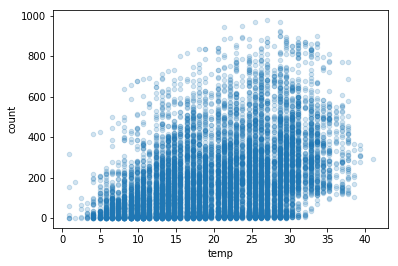

In [4]:
bikes.plot(kind='scatter', x='temp', y='count', alpha=0.2)

C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


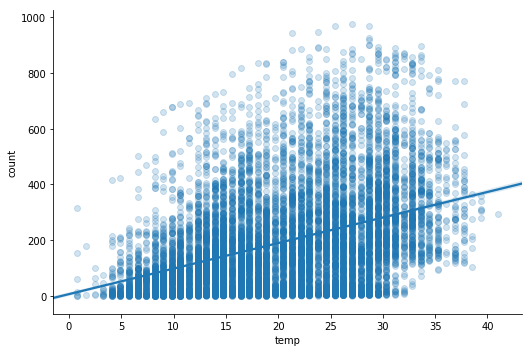

In [5]:
import seaborn as sns #using seaborn to get a line of best fit
sns.lmplot(x='temp', y='count', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

In [6]:
bikes[['count', 'temp']].corr()

,count,temp
count,1.000000,0.394454
temp,0.394454,1.000000


In [8]:
# create X and y
feature_cols = ['temp'] # a lsit of the predictors
X = bikes[feature_cols] # subsetting our data to only the predictors
y = bikes['count'] # our response variable

In [9]:
# import scikit-learn, our machine learning module
from sklearn.linear_model import LinearRegression

In [11]:
linreg = LinearRegression() #instantiate a new model
linreg.fit(X, y) #fit the model to our data

# print the coefficients
print(linreg.intercept_)
print(linreg.coef_)

6.046212959616781
[9.17054048]


In [12]:
linreg.predict(20)
# make a prediction

array([189.45702259])

In [13]:
# create a list of features
feature_cols = ['temp', 'season', 'weather', 'humidity']
# create X and y
X = bikes[feature_cols]
y = bikes['count']

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


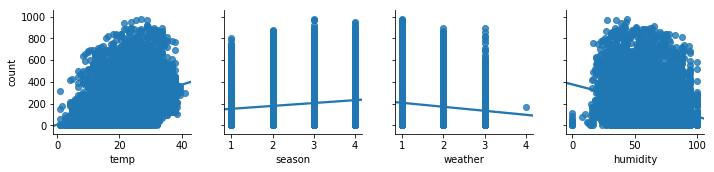

In [14]:
feature_cols = ['temp', 'season', 'weather', 'humidity']
# multiple scatter plots
sns.pairplot(bikes, x_vars=feature_cols, y_vars='count', kind='reg')

In [16]:
# example true and predicted response values
true = [9, 6, 7, 6]
pred = [8, 7, 7, 12]


# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(true, pred))
print('MSE:', metrics.mean_squared_error(true, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

MAE: 2.0
MSE: 9.5
RMSE: 3.082207001484488


In [17]:
from sklearn import metrics
# import metrics from scikit learn

feature_cols = ['temp']
# create X and y
X = bikes[feature_cols]
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_pred)) # RMSE
# Can be interpreted loosely as an average error

166.44886243326746

In [18]:
feature_cols = ['temp', 'humidity', 'season', 'holiday', 'workingday', 'windspeed', 'atemp']
# create X and y
X = bikes[feature_cols]
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_pred)) # RMSE
# Can be interpreted loosely as an average error

155.75989143430357

In [19]:
from sklearn.cross_validation import train_test_split
# function that splits data into training and testing sets


feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes['count']
X_train, X_test, y_train, y_test = train_test_split(X, y)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

C:\Users\skakade\AppData\Local\Continuum\anaconda5\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


162.70109639491022

In [20]:
feature_cols = ['temp', 'workingday']
X = bikes[feature_cols]
y = bikes['count']
X_train, X_test, y_train, y_test = train_test_split(X, y)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

163.96223577215738